In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read csv files

train_path = '/home/kayode/KAYODE/PROJECTS/Toxic_Kaggle/train.csv'
test = '/home/kayode/KAYODE/PROJECTS/Toxic_Kaggle/test.csv'


In [8]:
# Use pandas to create data frames.
#'train.csv''train.csv''train.csv''train.csv''train.csv''train.csv'test_df = pd.read_csv('test.csv')
train_df = pd.read_csv(train_path)

# Merge both datasets into one dataframe
#total_df = pd.concat([train_df,test_df])
#total_df.head()

In [9]:
# add new column: Clean = 1 if all others are 0s and 0 otherwise 
train_df['Clean'] = np.where((train_df['toxic']==0) & (train_df['insult']==0) & (train_df['identity_hate']==0) 
             & (train_df['obscene']==0) & (train_df['severe_toxic']==0) & (train_df['threat']==0), 1, 0)

train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Clean
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0,1
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0,1
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0,1
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0,1


In [10]:
#initialize dictionnary to store count
d = {}

for i in list(train_df.columns)[2:]:
    d[i]=len(train_df[train_df[i]==1])

# Dataframe with the counts 
count_df = pd.DataFrame(list(d.items()),columns=['Category','Count'])
count_df = count_df.sort_values(['Count'])

count_df

,Category,Count
1,threat,305
2,identity_hate,814
3,severe_toxic,965
5,insult,4765
0,obscene,5109
6,toxic,9237
4,Clean,86061


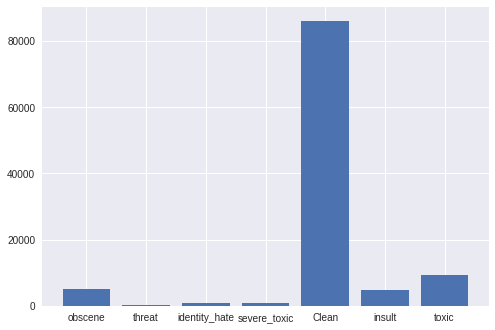

In [11]:
# Graph with counts
g_count = plt.bar(range(len(d)), d.values(), align='center')
g_count = plt.xticks(range(len(d)), list(d.keys()))
g_count = plt.show() #add numbers as label

In [12]:
# We can try to look at the train dataset without all the clean comments:

subtrain_df = train_df[(train_df['toxic']==1) | (train_df['insult']==1) | (train_df['identity_hate']==1) 
             | (train_df['obscene']==1) | (train_df['severe_toxic']==1) | (train_df['threat']==1)]

subtrain_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Clean
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0,0
20,225701312,Why hasn't Alitalia been removed rom the allia...,1,0,0,0,0,0,0
26,293668009,"""\nThe Graceful Slick....\nIs non other than a...",1,0,0,0,0,0,0
30,341549388,"""\n\n Stupid? \n\nAs soon as I saw the phrase ...",1,0,0,0,0,0,0
32,345843351,"""\nBan one side of an argument by a bullshit n...",1,0,1,0,1,0,0


In [13]:
# We can also make a dataframe for each type of data

train_toxic_df = train_df[train_df['toxic']==1]
train_severetoxic_df = train_df[train_df['severe_toxic']==1]
train_obscene_df = train_df[train_df['obscene']==1]
train_threat_df = train_df[train_df['threat']==1]
train_insult_df = train_df[train_df['insult']==1]
train_identityhate_df = train_df[train_df['identity_hate']==1]

In [14]:
# Maybe try to pick  up words that repeat in many statements

In [15]:
## function to prepare data for model

def data_generator(dataset):  # dataset would be our full dataframe with all columns - total_df (both train + test data)
    comments_list = []  
    for i in range(len(dataset['comment_text'])):
        comments_list.append(list(dataset['comment_text'][i]))
        
    category_list = []  
    for i in range(len(dataset['comment_text'])):
        category_list.append(list(train_df.iloc[1,2:]))    
    
    return(list(zip(comments_list, category_list)))

## output is (should be!) a list or pairs (x,y) such that x = list of character of comment on a row, 
## and y = the list of 1 and 0s corresponding to each categories (might be more than one 1)

In [16]:
data_generator(train_df[0:3])

[(['N',
   'o',
   'n',
   's',
   'e',
   'n',
   's',
   'e',
   '?',
   ' ',
   ' ',
   'k',
   'i',
   's',
   's',
   ' ',
   'o',
   'f',
   'f',
   ',',
   ' ',
   'g',
   'e',
   'e',
   'k',
   '.',
   ' ',
   'w',
   'h',
   'a',
   't',
   ' ',
   'I',
   ' ',
   's',
   'a',
   'i',
   'd',
   ' ',
   'i',
   's',
   ' ',
   't',
   'r',
   'u',
   'e',
   '.',
   ' ',
   ' ',
   'I',
   "'",
   'l',
   'l',
   ' ',
   'h',
   'a',
   'v',
   'e',
   ' ',
   'y',
   'o',
   'u',
   'r',
   ' ',
   'a',
   'c',
   'c',
   'o',
   'u',
   'n',
   't',
   ' ',
   't',
   'e',
   'r',
   'm',
   'i',
   'n',
   'a',
   't',
   'e',
   'd',
   '.'],
  [0, 0, 0, 0, 0, 0, 1]),
 (['"',
   '\n',
   '\n',
   ' ',
   'P',
   'l',
   'e',
   'a',
   's',
   'e',
   ' ',
   'd',
   'o',
   ' ',
   'n',
   'o',
   't',
   ' ',
   'v',
   'a',
   'n',
   'd',
   'a',
   'l',
   'i',
   'z',
   'e',
   ' ',
   'p',
   'a',
   'g',
   'e',
   's',
   ',',
   ' ',
   'a',
   's',
   ' ',
   